# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import KNNImputer

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.options.mode.use_inf_as_na = True

In [ ]:
df = pd.read_csv('athlete_events.csv')

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
df['Medal'].value_counts()

Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
df1['Medal'] = df1['Medal'].fillna('None')
df1['Medal'].value_counts()

Medal
None      231333
Gold       13372
Bronze     13295
Silver     13116
Name: count, dtype: int64

In [ ]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


We check for the missing values related to the rows where there was a medal won

In [ ]:
print(df1[(df1['Medal'] == 'Bronze') & (df1['Age'].isna())].shape[0])
print(df1[(df1['Medal'] == 'Silver') & (df1['Age'].isna())].shape[0])
print(df1[(df1['Medal'] == 'Gold') & (df1['Age'].isna())].shape[0])
print(f"There are {df1[(df1['Medal'] == 'Bronze') & (df1['Age'].isna())].shape[0] + df1[(df1['Medal'] == 'Silver') & (df1['Age'].isna())].shape[0] + df1[(df1['Medal'] == 'Gold') & (df1['Age'].isna())].shape[0]} rows where there is missing data of champions")

289
295
148
There are 732 rows where there is missing data of champions


In [ ]:
df_na = df1[((df1['Medal'] == 'Gold') | (df1['Medal'] == 'Silver') | (df1['Medal'] == 'Bronze')) & ((df1['Age'].isna()) | (df1['Height'].isna()) | (df1['Weight'].isna()))]

In [ ]:
df_na.shape[0]

9602

In [ ]:
df_na.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
86,25,Alf Lied Aanning,M,24.0,NaN,NaN,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver


In [ ]:
name_counts = df_na['Name'].value_counts()
name_counts[:10]

Name
Edoardo Mangiarotti                              13
Viktor Ivanovych Chukarin                        11
Carl Townsend Osburn                             11
Gerard Theodor Hubert Van Innis                  10
gnes Keleti-Srkny (Klein)                        10
Alfred Gomer Albert "Alf" Swahn                   9
Giulio Gaudini                                    9
Margit Korondi (Kronstein-, -Plachy, -Szalay)     8
Gustaf Vilhelm Carlberg                           8
Otto Martin Olsen                                 8
Name: count, dtype: int64

In [ ]:
filtered_df = df_na[df_na['Name'].isin(name_counts.index[name_counts > 4])]
filtered_df.shape[0]

545

In [ ]:
len(filtered_df['Name'].value_counts())

89

In [ ]:
names_corrected = filtered_df['Name'].value_counts()
names_corrected.index

Index(['Edoardo Mangiarotti', 'Carl Townsend Osburn',
       'Viktor Ivanovych Chukarin', 'Gerard Theodor Hubert Van Innis',
       'gnes Keleti-Srkny (Klein)', 'Giulio Gaudini',
       'Alfred Gomer Albert "Alf" Swahn', 'Georg "Georges" Miez',
       'Margit Korondi (Kronstein-, -Plachy, -Szalay)',
       'Gustaf Vilhelm Carlberg', 'Philippe Louis Eugne Cattiau', 'Eugen Mack',
       'Otto Martin Olsen', 'Roger Franois Ducret',
       'Albert Helgerud (Thorvaldsen-)', 'Mariya Kindrativna Horokhovska',
       'Lon Ernest Moreaux', 'Lloyd Spencer Spooner', 'Gustavo Marzi',
       'Josef "Sepp" Stalder', 'Ivar Eugen Ballangrud (Eriksen-)',
       'Willis Augustus Lee, Jr.', 'Einar Liberg', 'Ole Andreas Lilloe-Olsen',
       'Roald Morel Larsen', 'Johan Hagbart Pedersen Grttumsbraaten',
       'Maurice Marie Lecoq', 'John Arthur Jarvis', 'Anton Heida', 'Nedo Nadi',
       'Alfred Page "Al" Lane', 'Maxime Omer Mathieu "Max" Omer-Dcugis',
       'Konrad Stheli', 'Peter Johann "Johnny" Weiss

In [ ]:
df1[df1['Name'] == 'Viktor Ivanovych Chukarin']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
41481,21402,Viktor Ivanovych Chukarin,M,30.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Individual All-Around,Gold
41482,21402,Viktor Ivanovych Chukarin,M,30.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Gold
41483,21402,Viktor Ivanovych Chukarin,M,30.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Floor Exercise,None
41484,21402,Viktor Ivanovych Chukarin,M,30.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Horse Vault,Gold
41485,21402,Viktor Ivanovych Chukarin,M,30.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Parallel Bars,Silver
41486,21402,Viktor Ivanovych Chukarin,M,30.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Horizontal Bar,None
41487,21402,Viktor Ivanovych Chukarin,M,30.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Rings,Silver
41488,21402,Viktor Ivanovych Chukarin,M,30.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
41489,21402,Viktor Ivanovych Chukarin,M,35.0,NaN,NaN,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Gymnastics,Gymnastics Men's Individual All-Around,Gold
41490,21402,Viktor Ivanovych Chukarin,M,35.0,NaN,NaN,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Gymnastics,Gymnastics Men's Team All-Around,Gold


We generate columns that will have a 1 for the rows where there was a missing data point, that will help the model understand these rows

In [ ]:
df1['Age_missing'] = df1['Age'].isnull().astype(int)
df1['Height_missing'] = df1['Height'].isnull().astype(int)
df1['Weight_missing'] = df1['Weight'].isnull().astype(int)

In [ ]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_missing,Height_missing,Weight_missing
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,0,1,1
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,1,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,0,0,0


In [ ]:
df1.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Age_missing',
       'Height_missing', 'Weight_missing'],
      dtype='object')

In [ ]:
desired_order = ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight','Age_missing','Height_missing','Weight_missing', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']
df1 = df1[desired_order]
df1.head()

,ID,Name,Sex,Age,Height,Weight,Age_missing,Height_missing,Weight_missing,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,0,0,0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,0,0,0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,0,1,1,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,0,1,1,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,0,0,0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [ ]:
df1.shape

(271116, 18)

Some more exploration of the dataset

<Axes: xlabel='Age', ylabel='Count'>

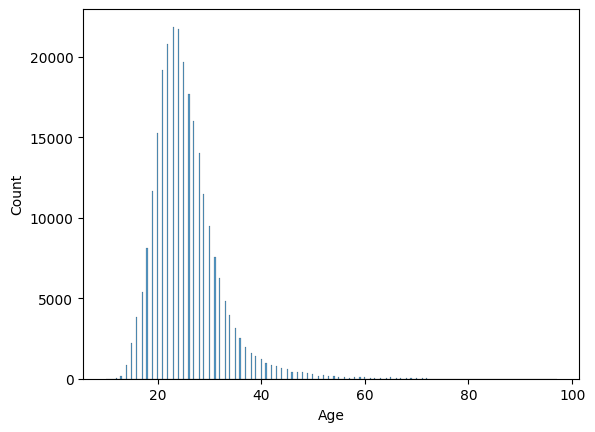

In [ ]:
sns.histplot(df1['Age'])

In [ ]:
df1['Age'].max()

97.0

In [ ]:
df1[(df1['Age'] >= 55) & ((df1['Medal'] == 'Gold') | (df1['Medal'] == 'Silver') | (df1['Medal'] == 'Bronze'))].shape

(101, 18)

In [ ]:
df['Age_group'] = np.nan

In [ ]:
df1['Age'] = pd.to_numeric(df1['Age'], errors='coerce', downcast='integer')

In [ ]:
df1['Age'] = df1['Age'].fillna(0).round().astype(int)
df1.head()

,ID,Name,Sex,Age,Height,Weight,Age_missing,Height_missing,Weight_missing,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.0,80.0,0,0,0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23,170.0,60.0,0,0,0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,0,1,1,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,0,1,1,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,0,0,0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


Creating a new column "Age_group" that groups the ages

In [ ]:
for i in range(len(df1['Age'])):
  if df1.loc[i,'Age'] == 0:
    df1.loc[i,'Age_group'] = 0
  elif df1.loc[i,'Age'] <= 15:
    df1.loc[i,'Age_group'] = 1
  elif df1.loc[i,'Age'] <=20:
    df1.loc[i,'Age_group'] = 2
  elif df1.loc[i,'Age'] <= 25:
    df1.loc[i,'Age_group'] = 3
  elif df1.loc[i,'Age'] <= 30:
    df1.loc[i,'Age_group'] = 4
  elif df1.loc[i,'Age'] <= 35:
    df1.loc[i,'Age_group'] = 5
  elif df1.loc[i,'Age'] <= 40:
    df1.loc[i,'Age_group'] = 6
  elif df1.loc[i,'Age'] <= 45:
    df1.loc[i,'Age_group'] = 7
  elif df1.loc[i,'Age'] <= 50:
    df1.loc[i,'Age_group'] = 8
  elif df1.loc[i,'Age'] <= 55:
    df1.loc[i,'Age_group'] = 9
  elif df1.loc[i,'Age'] <= 60:
    df1.loc[i,'Age_group'] = 10
  elif df1.loc[i,'Age'] > 60:
    df1.loc[i,'Age_group'] = 11

In [ ]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Age_missing,Height_missing,Weight_missing,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_group
0,1,A Dijiang,M,24,180.0,80.0,0,0,0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,3.0
1,2,A Lamusi,M,23,170.0,60.0,0,0,0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,3.0
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,0,1,1,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,3.0
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,0,1,1,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,5.0
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,0,0,0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,3.0


In [ ]:
df1['Age_group'].value_counts()

Age_group
3.0     103280
4.0      68694
2.0      44281
5.0      25723
0.0       9474
6.0       8683
7.0       3879
1.0       3280
8.0       1884
9.0        909
11.0       570
10.0       459
Name: count, dtype: int64

Creating a new column that calculates the BMI

In [ ]:
df1['BMI'] = df['Weight'] / (df['Height'] ** 2)
df1.head()

,ID,Name,Sex,Age,Height,Weight,Age_missing,Height_missing,Weight_missing,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_group,BMI
0,1,A Dijiang,M,24,180.0,80.0,0,0,0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,3.0,0.002469
1,2,A Lamusi,M,23,170.0,60.0,0,0,0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,3.0,0.002076
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,0,1,1,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,3.0,NaN
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,0,1,1,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,5.0,NaN
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,0,0,0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,3.0,0.002396


Creating a new variable with sex binary classification

In [ ]:
sex_mapping = {'M': 0, 'F': 1}
df1['Sex_binary'] = df1['Sex'].map(sex_mapping)
df1.head()

,ID,Name,Sex,Age,Height,Weight,Age_missing,Height_missing,Weight_missing,Team,...,Games,Year,Season,City,Sport,Event,Medal,Age_group,BMI,Sex_binary
0,1,A Dijiang,M,24,180.0,80.0,0,0,0,China,...,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,3.0,0.002469,0
1,2,A Lamusi,M,23,170.0,60.0,0,0,0,China,...,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,3.0,0.002076,0
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,0,1,1,Denmark,...,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,3.0,NaN,0
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,0,1,1,Denmark/Sweden,...,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,5.0,NaN,0
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,0,0,0,Netherlands,...,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,3.0,0.002396,1


Creating a new variable with season binary classification

In [ ]:
season_mapping = {'Summer': 0, 'Winter': 1}
df1['Season_binary'] = df1['Season'].map(season_mapping)
df1.head()

,ID,Name,Sex,Age,Height,Weight,Age_missing,Height_missing,Weight_missing,Team,...,Year,Season,City,Sport,Event,Medal,Age_group,BMI,Sex_binary,Season_binary
0,1,A Dijiang,M,24,180.0,80.0,0,0,0,China,...,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,3.0,0.002469,0,0
1,2,A Lamusi,M,23,170.0,60.0,0,0,0,China,...,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,3.0,0.002076,0,0
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,0,1,1,Denmark,...,1920,Summer,Antwerpen,Football,Football Men's Football,None,3.0,NaN,0,0
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,0,1,1,Denmark/Sweden,...,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,5.0,NaN,0,0
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,0,0,0,Netherlands,...,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,3.0,0.002396,1,1


Grouping the countries with less than 100 values in the dataset as "OTHER"

In [ ]:
len(df1['NOC'].value_counts().index)

230

In [ ]:
df1.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Age_missing',
       'Height_missing', 'Weight_missing', 'Team', 'NOC', 'Games', 'Year',
       'Season', 'City', 'Sport', 'Event', 'Medal', 'Age_group', 'BMI',
       'Sex_binary', 'Season_binary'],
      dtype='object')

In [ ]:
category_counts = df1['NOC'].value_counts()
print(len(category_counts[category_counts < 100].index))
least_represented_countries = category_counts[category_counts < 100].index

86


In [ ]:
category_counts[category_counts < 100].index

Index(['IOA', 'NEP', 'MNE', 'COD', 'SAA', 'MLI', 'BOT', 'MAW', 'ANZ', 'MKD',
       'LBA', 'CAY', 'JOR', 'AHO', 'MOZ', 'NAM', 'BIZ', 'LBR', 'GUI', 'BEN',
       'TJK', 'ALB', 'SUR', 'CAF', 'SWZ', 'OMA', 'LES', 'CAM', 'GAB', 'SAM',
       'VNM', 'TOG', 'GAM', 'RWA', 'BAN', 'TKM', 'GRN', 'LAO', 'MDV', 'NIG',
       'TGA', 'IVB', 'MAL', 'BUR', 'ERI', 'ARU', 'VIN', 'SKN', 'CHA', 'COK',
       'GEQ', 'BDI', 'DJI', 'ASA', 'BHU', 'VAN', 'YEM', 'SOM', 'MTN', 'LCA',
       'SOL', 'FSM', 'PLW', 'PLE', 'GBS', 'WIF', 'DMA', 'COM', 'CPV', 'STP',
       'MHL', 'NRU', 'RHO', 'ROT', 'KIR', 'CRT', 'YAR', 'BRU', 'TLS', 'KOS',
       'TUV', 'YMD', 'SSD', 'UNK', 'NBO', 'NFL'],
      dtype='object', name='NOC')

In [ ]:
df1['NOC'] = df1['NOC'].replace(least_represented_countries, 'OTHER')
df1.head()

,ID,Name,Sex,Age,Height,Weight,Age_missing,Height_missing,Weight_missing,Team,...,Year,Season,City,Sport,Event,Medal,Age_group,BMI,Sex_binary,Season_binary
0,1,A Dijiang,M,24,180.0,80.0,0,0,0,China,...,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,3.0,0.002469,0,0
1,2,A Lamusi,M,23,170.0,60.0,0,0,0,China,...,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,3.0,0.002076,0,0
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,0,1,1,Denmark,...,1920,Summer,Antwerpen,Football,Football Men's Football,None,3.0,NaN,0,0
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,0,1,1,Denmark/Sweden,...,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,5.0,NaN,0,0
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,0,0,0,Netherlands,...,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,3.0,0.002396,1,1


In [ ]:
df1['NOC'].value_counts()

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
PNG      108
SUD      107
HAI      106
CGO      105
GUY      102
Name: count, Length: 145, dtype: int64

Grouping the "Year" variable into a new column

In [ ]:
df1['Year'].value_counts().index.sort_values()

Index([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1994,
       1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016],
      dtype='int64', name='Year')

In [ ]:
for i in range(len(df1['Year'])):
  if df1.loc[i, 'Year'] < 1916:
    df1.loc[i, 'Year_group'] = 0
  elif df1.loc[i,'Year'] <= 1936:
    df1.loc[i, 'Year_group'] = 1
  elif df1.loc[i,'Year'] <= 1956:
    df1.loc[i, 'Year_group'] = 2
  elif df1.loc[i,'Year'] <= 1976:
    df1.loc[i, 'Year_group'] = 3
  elif df1.loc[i,'Year'] <= 1996:
    df1.loc[i, 'Year_group'] = 4
  elif df1.loc[i,'Year'] <= 2016:
    df1.loc[i, 'Year_group'] = 5

In [ ]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Age_missing,Height_missing,Weight_missing,Team,...,Season,City,Sport,Event,Medal,Age_group,BMI,Sex_binary,Season_binary,Year_group
0,1,A Dijiang,M,24,180.0,80.0,0,0,0,China,...,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,3.0,0.002469,0,0,4.0
1,2,A Lamusi,M,23,170.0,60.0,0,0,0,China,...,Summer,London,Judo,Judo Men's Extra-Lightweight,None,3.0,0.002076,0,0,5.0
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,0,1,1,Denmark,...,Summer,Antwerpen,Football,Football Men's Football,None,3.0,NaN,0,0,1.0
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,0,1,1,Denmark/Sweden,...,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,5.0,NaN,0,0,0.0
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,0,0,0,Netherlands,...,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,3.0,0.002396,1,1,4.0


Binary classification for "Medal" column, representing if a given athlete won or not a medal

In [ ]:
for i in range(len(df1['Medal'])):
  if df1.loc[i, 'Medal'] == 'None':
    df1.loc[i, 'Medal_binary'] = 0
  elif df1.loc[i,'Medal'] == 'Bronze':
    df1.loc[i, 'Medal_binary'] = 1
  elif df1.loc[i,'Medal'] == 'Silver':
    df1.loc[i, 'Medal_binary'] = 1
  elif df1.loc[i,'Medal'] == 'Gold':
    df1.loc[i, 'Medal_binary'] = 1

In [ ]:
df1['Year_group'] = df1['Year_group'].astype(int)

In [ ]:
df1['Medal_binary'] = df1['Medal_binary'].astype(int)

In [ ]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Age_missing,Height_missing,Weight_missing,Team,...,City,Sport,Event,Medal,Age_group,BMI,Sex_binary,Season_binary,Year_group,Medal_binary
0,1,A Dijiang,M,24,180.0,80.0,0,0,0,China,...,Barcelona,Basketball,Basketball Men's Basketball,None,3.0,0.002469,0,0,4,0
1,2,A Lamusi,M,23,170.0,60.0,0,0,0,China,...,London,Judo,Judo Men's Extra-Lightweight,None,3.0,0.002076,0,0,5,0
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,0,1,1,Denmark,...,Antwerpen,Football,Football Men's Football,None,3.0,NaN,0,0,1,0
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,0,1,1,Denmark/Sweden,...,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,5.0,NaN,0,0,0,1
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,0,0,0,Netherlands,...,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,3.0,0.002396,1,1,4,0


In [ ]:
df1.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Age_missing',
       'Height_missing', 'Weight_missing', 'Team', 'NOC', 'Games', 'Year',
       'Season', 'City', 'Sport', 'Event', 'Medal', 'Age_group', 'BMI',
       'Sex_binary', 'Season_binary', 'Year_group', 'Medal_binary'],
      dtype='object')

In [ ]:
reorder_desired = ['ID', 'Name', 'Sex', 'Sex_binary', 'Age','Age_group', 'Height', 'Weight','BMI', 'Age_missing',
       'Height_missing', 'Weight_missing', 'Team', 'NOC', 'Games', 'Year', 'Year_group',
       'Season', 'Season_binary', 'City', 'Sport', 'Event', 'Medal','Medal_binary']
df1 = df1[reorder_desired]
df1.head()

,ID,Name,Sex,Sex_binary,Age,Age_group,Height,Weight,BMI,Age_missing,...,Games,Year,Year_group,Season,Season_binary,City,Sport,Event,Medal,Medal_binary
0,1,A Dijiang,M,0,24,3.0,180.0,80.0,0.002469,0,...,1992 Summer,1992,4,Summer,0,Barcelona,Basketball,Basketball Men's Basketball,None,0
1,2,A Lamusi,M,0,23,3.0,170.0,60.0,0.002076,0,...,2012 Summer,2012,5,Summer,0,London,Judo,Judo Men's Extra-Lightweight,None,0
2,3,Gunnar Nielsen Aaby,M,0,24,3.0,NaN,NaN,NaN,0,...,1920 Summer,1920,1,Summer,0,Antwerpen,Football,Football Men's Football,None,0
3,4,Edgar Lindenau Aabye,M,0,34,5.0,NaN,NaN,NaN,0,...,1900 Summer,1900,0,Summer,0,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,5,Christine Jacoba Aaftink,F,1,21,3.0,185.0,82.0,0.002396,0,...,1988 Winter,1988,4,Winter,1,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,0


Save the dataset generated

In [ ]:
df1.to_csv('improved_df.csv', index=False)

In [ ]:
train_test_df = df1[['Sex_binary', 'Age','Age_group', 'Height', 'Weight','BMI', 'Age_missing',
                     'Height_missing', 'Weight_missing', 'NOC', 'Year', 'Year_group',
                     'Season_binary','Sport','Medal_binary']]
train_test_df.head()

,Sex_binary,Age,Age_group,Height,Weight,BMI,Age_missing,Height_missing,Weight_missing,NOC,Year,Year_group,Season_binary,Sport,Medal_binary
0,0,24,3.0,180.0,80.0,0.002469,0,0,0,CHN,1992,4,0,Basketball,0
1,0,23,3.0,170.0,60.0,0.002076,0,0,0,CHN,2012,5,0,Judo,0
2,0,24,3.0,NaN,NaN,NaN,0,1,1,DEN,1920,1,0,Football,0
3,0,34,5.0,NaN,NaN,NaN,0,1,1,DEN,1900,0,0,Tug-Of-War,1
4,1,21,3.0,185.0,82.0,0.002396,0,0,0,NED,1988,4,1,Speed Skating,0


In [ ]:
train_test_df.shape

(271116, 15)

We proceed to create the Train-Test Dataset

In [ ]:
X = train_test_df.drop(columns=['Medal_binary'])
y = train_test_df['Medal_binary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((216892, 14), (54224, 14))

We separate the variables into numeric and categorical, the numeric NA values will be imputed using KNN, the ones for the categorical variables will be filled with "Not Available". We will also scale the numeric variables

In [ ]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

categorical_features, numeric_features

(['NOC', 'Sport'],
 ['Sex_binary',
  'Age',
  'Age_group',
  'Height',
  'Weight',
  'BMI',
  'Age_missing',
  'Height_missing',
  'Weight_missing',
  'Year',
  'Year_group',
  'Season_binary'])

In [ ]:
categorical_transformer = Pipeline(steps=[
                                          ("cat_imputer", SimpleImputer(strategy='constant',
                                                                        fill_value='Not Available').set_output(transform="pandas")),
                                          ("onehot", OneHotEncoder(sparse_output=False,
                                                                   handle_unknown="ignore").set_output(transform="pandas"))
                                          ])
categorical_transformer

Pipeline(steps=[('cat_imputer',
                 SimpleImputer(fill_value='Not Available',
                               strategy='constant')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
numeric_transformer = Pipeline(steps=[
                                      ("knn_imputer", KNNImputer(n_neighbors=5).set_output(transform="pandas")),
                                      ("scaler", StandardScaler().set_output(transform="pandas"))
                                      ])

numeric_transformer

Pipeline(steps=[('knn_imputer', KNNImputer()), ('scaler', StandardScaler())])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer, numeric_features),
                                               ("cat", categorical_transformer, categorical_features)
                                               ]).set_output(transform="pandas")
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('knn_imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Sex_binary', 'Age', 'Age_group', 'Height',
                                  'Weight', 'BMI', 'Age_missing',
                                  'Height_missing', 'Weight_missing', 'Year',
                                  'Year_group', 'Season_binary']),
                                ('cat',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(fill_value='Not '
                                                                           'Available',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['NOC', 'Sport'])])

In [ ]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

#LOGISTIC REGRESSION

We create a Logistic Regression model, adding it to the pipeline built and running it towards the train and test datasets

In [ ]:
lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
pipeline_lr = Pipeline(steps=[
                              ("pre_process", preprocessor),
                              ("model", lr_model)
                              ])
pipeline_lr

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Sex_binary', 'Age',
                                                   'Age_group', 'Height',
                                                   'Weight', 'BMI',
                                                   'Age_missing',
                                                   'Height_missing',
                                                   'Weight_missing', 'Year',
                                                   'Year_group',
                                                   'Season_binary']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Not '
                                                                                            'Available',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['NOC', 'Sport'])])),
                ('model',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [ ]:
pipeline_lr.fit(X_train, y_train)

y_pred = pipeline_lr.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[45865,   402],
       [ 7327,   630]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     46267
           1       0.61      0.08      0.14      7957

    accuracy                           0.86     54224
   macro avg       0.74      0.54      0.53     54224
weighted avg       0.83      0.86      0.81     54224



#LR Using SMOTE

We follow the same process as above, this time adding SMOTE that will help us to deal with the imbalanced data

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline

pipeline_smote = ImbPipeline(steps=[
                              ("pre_process", preprocessor),
                              ("smote", SMOTE(random_state=42)), # this step runs only during training
                              ("model", lr_model)
                              ])
pipeline_smote

In [ ]:
pipeline_smote.fit(X_train, y_train)

y_pred = pipeline_smote.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

#NEURAL NETWORK

We proceed with the creation of an NN

In [ ]:
import tensorflow as tf

In [ ]:
X.shape

(271116, 14)

In [ ]:
X_transformed = preprocessor.fit_transform(X)

In [ ]:
X_transformed.to_csv('transformed_x.csv', index=False)

In [ ]:
X_train_t, X_test_t, y_train, y_test = train_test_split(X_transformed, y, train_size=0.7, random_state=42)

In [ ]:
X_train_t.head()

,num__Sex_binary,num__Age,num__Age_group,num__Height,num__Weight,num__BMI,num__Age_missing,num__Height_missing,num__Weight_missing,num__Year,...,cat__Sport_Table Tennis,cat__Sport_Taekwondo,cat__Sport_Tennis,cat__Sport_Trampolining,cat__Sport_Triathlon,cat__Sport_Tug-Of-War,cat__Sport_Volleyball,cat__Sport_Water Polo,cat__Sport_Weightlifting,cat__Sport_Wrestling
46303,-0.615683,0.680579,0.428968,1.799356,1.342996,0.358591,-0.190289,-0.534083,-0.549485,-0.481247,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167394,-0.615683,0.808120,1.129458,-0.366122,-0.086328,0.273647,-0.190289,-0.534083,-0.549485,1.192249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14391,-0.615683,0.042876,-0.271521,-0.572358,0.064127,0.732426,-0.190289,-0.534083,-0.549485,0.589791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217310,1.624213,-0.084665,-0.271521,-1.087948,-1.139514,-0.859365,-0.190289,-0.534083,-0.549485,-0.079608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70012,-0.615683,-0.594827,-0.972011,-1.397302,-0.462466,0.678955,-0.190289,-0.534083,-0.549485,-0.882886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
inputs = tf.keras.Input(shape=(X_transformed.shape[1]))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


history = model.fit(
    X_train_t,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/20
4745/4745 [==============================] - 26s 4ms/step - loss: 0.3512 - accuracy: 0.8605 - auc: 0.7736 - val_loss: 0.3273 - val_accuracy: 0.8674 - val_auc: 0.8173
Epoch 2/20
4745/4745 [==============================] - 24s 5ms/step - loss: 0.3171 - accuracy: 0.8714 - auc: 0.8271 - val_loss: 0.3114 - val_accuracy: 0.8745 - val_auc: 0.8376
Epoch 3/20
4745/4745 [==============================] - 20s 4ms/step - loss: 0.3026 - accuracy: 0.8762 - auc: 0.8462 - val_loss: 0.3069 - val_accuracy: 0.8721 - val_auc: 0.8469
Epoch 4/20
4745/4745 [==============================] - 21s 5ms/step - loss: 0.2941 - accuracy: 0.8781 - auc: 0.8570 - val_loss: 0.2988 - val_accuracy: 0.8769 - val_auc: 0.8531
Epoch 5/20
4745/4745 [==============================] - 21s 4ms/step - loss: 0.2877 - accuracy: 0.8806 - auc: 0.8644 - val_loss: 0.2946 - val_accuracy: 0.8792 - val_auc: 0.8585
Epoch 6/20
4745/4745 [==============================] - 20s 4ms/step - loss: 0.2827 - accuracy: 0.8819 - auc: 0.869

In [ ]:
model.evaluate(X_test_t, y_test)

2542/2542 [==============================] - 8s 3ms/step - loss: 0.2822 - accuracy: 0.8846 - auc: 0.8711


[0.28222835063934326, 0.8845884203910828, 0.8711079359054565]

In [ ]:
y_true = np.array(y_test)
y_pred = np.squeeze(np.array(model.predict(X_test_t) >= 0.5, dtype=int))

2542/2542 [==============================] - 6s 2ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94     69407
           1       0.71      0.36      0.48     11928

    accuracy                           0.88     81335
   macro avg       0.80      0.67      0.71     81335
weighted avg       0.87      0.88      0.87     81335



We try adding more dense layers

In [ ]:
inputs = tf.keras.Input(shape=(X_transformed.shape[1]))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


history = model.fit(
    X_train_t,
    y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=40,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/40
2373/2373 [==============================] - 15s 5ms/step - loss: 0.3537 - accuracy: 0.8604 - auc: 0.7694 - val_loss: 0.3302 - val_accuracy: 0.8674 - val_auc: 0.8090
Epoch 2/40
2373/2373 [==============================] - 12s 5ms/step - loss: 0.3169 - accuracy: 0.8718 - auc: 0.8269 - val_loss: 0.3097 - val_accuracy: 0.8742 - val_auc: 0.8389
Epoch 3/40
2373/2373 [==============================] - 12s 5ms/step - loss: 0.3014 - accuracy: 0.8769 - auc: 0.8471 - val_loss: 0.3030 - val_accuracy: 0.8761 - val_auc: 0.8508
Epoch 4/40
2373/2373 [==============================] - 13s 5ms/step - loss: 0.2922 - accuracy: 0.8795 - auc: 0.8587 - val_loss: 0.3009 - val_accuracy: 0.8768 - val_auc: 0.8526
Epoch 5/40
2373/2373 [==============================] - 11s 5ms/step - loss: 0.2853 - accuracy: 0.8815 - auc: 0.8669 - val_loss: 0.2949 - val_accuracy: 0.8807 - val_auc: 0.8590
Epoch 6/40
2373/2373 [==============================] - 11s 5ms/step - loss: 0.2800 - accuracy: 0.8834 - auc: 0.872

In [ ]:
model.evaluate(X_test_t, y_test)
y_true = np.array(y_test)
y_pred = np.squeeze(np.array(model.predict(X_test_t) >= 0.5, dtype=int))
print(classification_report(y_true, y_pred))

2542/2542 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     69407
           1       0.68      0.41      0.51     11928

    accuracy                           0.88     81335
   macro avg       0.79      0.69      0.72     81335
weighted avg       0.87      0.88      0.87     81335



We compute and add class weights to fight the imbalanced dataset

In [92]:
from sklearn.utils.class_weight import compute_class_weight
compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)

array([0.58598644, 3.40743534])

In [93]:
balanced_weights = {0:0.58598644, 1:3.40743534}
balanced_weights

{0: 0.58598644, 1: 3.40743534}

In [ ]:
inputs = tf.keras.Input(shape=(X_transformed.shape[1]))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


history = model.fit(
    X_train_t,
    y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=40,
    class_weight=balanced_weights,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/40
2373/2373 [==============================] - 18s 6ms/step - loss: 0.5659 - accuracy: 0.6826 - auc: 0.7745 - val_loss: 0.5216 - val_accuracy: 0.7152 - val_auc: 0.8095
Epoch 2/40
2373/2373 [==============================] - 12s 5ms/step - loss: 0.5075 - accuracy: 0.7238 - auc: 0.8263 - val_loss: 0.5292 - val_accuracy: 0.7135 - val_auc: 0.8352
Epoch 3/40
2373/2373 [==============================] - 10s 4ms/step - loss: 0.4787 - accuracy: 0.7448 - auc: 0.8478 - val_loss: 0.4352 - val_accuracy: 0.7738 - val_auc: 0.8494
Epoch 4/40
2373/2373 [==============================] - 12s 5ms/step - loss: 0.4600 - accuracy: 0.7542 - auc: 0.8600 - val_loss: 0.5096 - val_accuracy: 0.7372 - val_auc: 0.8541
Epoch 5/40
2373/2373 [==============================] - 12s 5ms/step - loss: 0.4469 - accuracy: 0.7594 - auc: 0.8681 - val_loss: 0.4852 - val_accuracy: 0.7420 - val_auc: 0.8593
Epoch 6/40
2373/2373 [==============================] - 12s 5ms/step - loss: 0.4368 - accuracy: 0.7637 - auc: 0.874

In [ ]:
model.evaluate(X_test_t, y_test)
y_true = np.array(y_test)
y_pred = np.squeeze(np.array(model.predict(X_test_t) >= 0.5, dtype=int))
print(classification_report(y_true, y_pred))

2542/2542 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     69407
           1       0.38      0.78      0.51     11928

    accuracy                           0.78     81335
   macro avg       0.67      0.78      0.68     81335
weighted avg       0.87      0.78      0.81     81335



### We proceed by adding the "Event" variable from the original dataset

This will help the NN to have more information when learning new patterns

In [ ]:
train_test_df = df1[['Sex_binary', 'Age','Age_group', 'Height', 'Weight','BMI', 'Age_missing',
                     'Height_missing', 'Weight_missing', 'NOC', 'Year', 'Year_group',
                     'Season_binary','Sport','Event', 'Medal_binary']]
train_test_df.head()

,Sex_binary,Age,Age_group,Height,Weight,BMI,Age_missing,Height_missing,Weight_missing,NOC,Year,Year_group,Season_binary,Sport,Event,Medal_binary
0,0,24,3.0,180.0,80.0,0.002469,0,0,0,CHN,1992,4,0,Basketball,Basketball Men's Basketball,0
1,0,23,3.0,170.0,60.0,0.002076,0,0,0,CHN,2012,5,0,Judo,Judo Men's Extra-Lightweight,0
2,0,24,3.0,NaN,NaN,NaN,0,1,1,DEN,1920,1,0,Football,Football Men's Football,0
3,0,34,5.0,NaN,NaN,NaN,0,1,1,DEN,1900,0,0,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,1,21,3.0,185.0,82.0,0.002396,0,0,0,NED,1988,4,1,Speed Skating,Speed Skating Women's 500 metres,0


In [ ]:
X = train_test_df.drop(columns=['Medal_binary'])
y = train_test_df['Medal_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

categorical_features, numeric_features

(['NOC', 'Sport', 'Event'],
 ['Sex_binary',
  'Age',
  'Age_group',
  'Height',
  'Weight',
  'BMI',
  'Age_missing',
  'Height_missing',
  'Weight_missing',
  'Year',
  'Year_group',
  'Season_binary'])

In [ ]:
categorical_transformer = Pipeline(steps=[
                                          ("cat_imputer", SimpleImputer(strategy='constant',
                                                                        fill_value='Not Available').set_output(transform="pandas")),
                                          ("onehot", OneHotEncoder(sparse_output=False,
                                                                   handle_unknown="ignore").set_output(transform="pandas"))
                                          ])


numeric_transformer = Pipeline(steps=[
                                      ("knn_imputer", KNNImputer(n_neighbors=5).set_output(transform="pandas")),
                                      ("scaler", StandardScaler().set_output(transform="pandas"))
                                      ])


preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer, numeric_features),
                                               ("cat", categorical_transformer, categorical_features)
                                               ]).set_output(transform="pandas")

In [ ]:
X_transformed2 = preprocessor.fit_transform(X)
X_transformed2.to_csv('transformed_x2.csv', index=False)

In [ ]:
X_transformed2.head()

,num__Sex_binary,num__Age,num__Age_group,num__Height,num__Weight,num__BMI,num__Age_missing,num__Height_missing,num__Weight_missing,num__Year,...,"cat__Event_Wrestling Men's Super-Heavyweight, Greco-Roman","cat__Event_Wrestling Men's Unlimited Class, Greco-Roman","cat__Event_Wrestling Men's Welterweight, Freestyle","cat__Event_Wrestling Men's Welterweight, Greco-Roman","cat__Event_Wrestling Women's Featherweight, Freestyle","cat__Event_Wrestling Women's Flyweight, Freestyle","cat__Event_Wrestling Women's Heavyweight, Freestyle","cat__Event_Wrestling Women's Light-Heavyweight, Freestyle","cat__Event_Wrestling Women's Lightweight, Freestyle","cat__Event_Wrestling Women's Middleweight, Freestyle"
0,-0.615683,-0.084665,-0.271521,0.458822,0.665948,0.651031,-0.190289,-0.534083,-0.549485,0.455911,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.615683,-0.212206,-0.271521,-0.572358,-0.838604,-0.789043,-0.190289,-0.534083,-0.549485,1.125309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.615683,-0.084665,-0.271521,0.025726,0.034036,-0.888030,-0.190289,1.872367,1.819886,-1.953923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.615683,1.190742,1.129458,0.293833,1.448315,2.115816,-0.190289,1.872367,1.819886,-2.623321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.624213,-0.467287,-0.271521,0.974412,0.816403,0.382714,-0.190289,-0.534083,-0.549485,0.322031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In case the kernal has to restart:

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [2]:
import tensorflow as tf

In [35]:
X_transformed2 = pd.read_csv('transformed_x2.csv')

In [10]:
train_test_df = pd.read_csv('improved_df.csv')

In [38]:
train_test_df.shape

(271116, 24)

In [36]:
X_transformed2.shape

(271116, 988)

In [39]:
y = train_test_df['Medal_binary']

In [40]:
y.shape

(271116,)

In [41]:
X_train_t, X_test_t, y_train, y_test = train_test_split(X_transformed2, y, train_size=0.7, random_state=32)

In [42]:
X_train_t.head()

,num__Sex_binary,num__Age,num__Age_group,num__Height,num__Weight,num__BMI,num__Age_missing,num__Height_missing,num__Weight_missing,num__Year,...,"cat__Event_Wrestling Men's Super-Heavyweight, Greco-Roman","cat__Event_Wrestling Men's Unlimited Class, Greco-Roman","cat__Event_Wrestling Men's Welterweight, Freestyle","cat__Event_Wrestling Men's Welterweight, Greco-Roman","cat__Event_Wrestling Women's Featherweight, Freestyle","cat__Event_Wrestling Women's Flyweight, Freestyle","cat__Event_Wrestling Women's Heavyweight, Freestyle","cat__Event_Wrestling Women's Light-Heavyweight, Freestyle","cat__Event_Wrestling Women's Lightweight, Freestyle","cat__Event_Wrestling Women's Middleweight, Freestyle"
251287,-0.615683,-0.722368,-0.972011,0.458822,0.289810,0.085567,-0.190289,-0.534083,-0.549485,0.723670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20849,-0.615683,0.297957,0.428968,0.665058,0.515493,0.232037,-0.190289,-0.534083,-0.549485,1.192249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173702,-0.615683,0.808120,1.129458,-0.263004,-0.312011,-0.193584,-0.190289,-0.534083,-0.549485,1.125309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179742,-0.615683,-0.467287,-0.271521,0.871294,0.214582,-0.387434,-0.190289,-0.534083,-0.549485,-0.615126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82663,-0.615683,-0.594827,-0.972011,0.665058,0.349992,0.228558,-0.190289,1.872367,1.819886,-0.882886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
inputs = tf.keras.Input(shape=(X_transformed2.shape[1]))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


history = model.fit(
    X_train_t,
    y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=40,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/40
1187/1187 [==============================] - 17s 9ms/step - loss: 0.3553 - accuracy: 0.8599 - auc: 0.7687 - val_loss: 0.3212 - val_accuracy: 0.8715 - val_auc: 0.8237
Epoch 2/40
1187/1187 [==============================] - 7s 6ms/step - loss: 0.3127 - accuracy: 0.8764 - auc: 0.8316 - val_loss: 0.2966 - val_accuracy: 0.8808 - val_auc: 0.8494
Epoch 3/40
1187/1187 [==============================] - 9s 8ms/step - loss: 0.2934 - accuracy: 0.8841 - auc: 0.8550 - val_loss: 0.2888 - val_accuracy: 0.8863 - val_auc: 0.8604
Epoch 4/40
1187/1187 [==============================] - 7s 6ms/step - loss: 0.2807 - accuracy: 0.8887 - auc: 0.8695 - val_loss: 0.2805 - val_accuracy: 0.8900 - val_auc: 0.8659
Epoch 5/40
1187/1187 [==============================] - 8s 6ms/step - loss: 0.2715 - accuracy: 0.8913 - auc: 0.8799 - val_loss: 0.2777 - val_accuracy: 0.8915 - val_auc: 0.8696
Epoch 6/40
1187/1187 [==============================] - 9s 8ms/step - loss: 0.2645 - accuracy: 0.8931 - auc: 0.8870 - v

In [44]:
model.evaluate(X_test_t, y_test)
y_true = np.array(y_test)
y_pred = np.squeeze(np.array(model.predict(X_test_t) >= 0.5, dtype=int))
print(classification_report(y_true, y_pred))

2542/2542 [==============================] - 6s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     69319
           1       0.69      0.46      0.55     12016

    accuracy                           0.89     81335
   macro avg       0.80      0.71      0.74     81335
weighted avg       0.88      0.89      0.88     81335



In [46]:
report = classification_report(y_true, y_pred, output_dict=True)
labels = [str(label) for label in report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]
precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1_score = [report[label]['f1-score'] for label in labels]

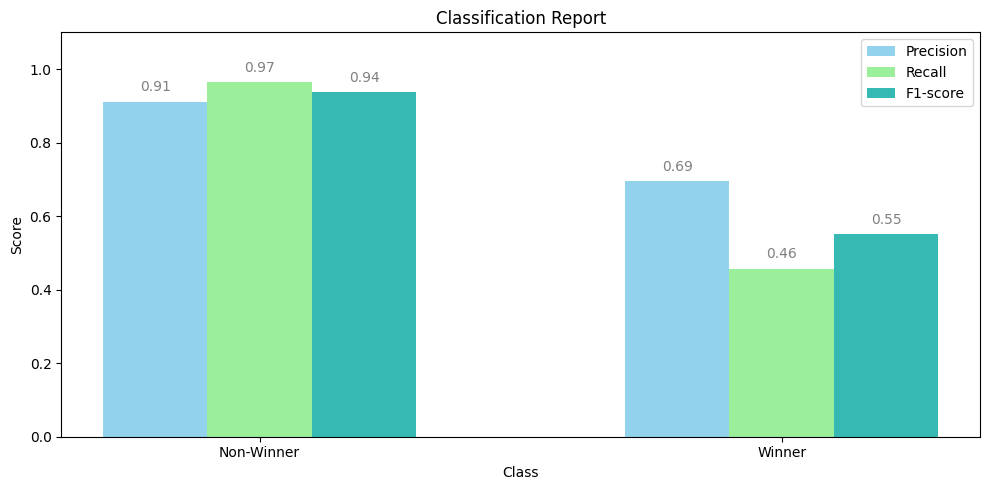

In [83]:
plt.figure(figsize=(10, 5))

bar_width = 0.2
index = np.arange(len(labels))


light_blue = 'skyblue'
light_green = 'lightgreen'
light_orange = 'lightseagreen'

plt.bar(index - bar_width, precision, color=light_blue, alpha=0.9, width=bar_width, label='Precision')
plt.bar(index, recall, color=light_green, alpha=0.9, width=bar_width, label='Recall')
plt.bar(index + bar_width, f1_score, color=light_orange, alpha=0.9, width=bar_width, label='F1-score')


plt.xticks(index, ['Non-Winner', 'Winner'])


for i, value in enumerate(precision):
    plt.text(i - bar_width, value + 0.02, f'{value:.2f}', ha='center', va='bottom', color='gray')

for i, value in enumerate(recall):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom', color='gray')

for i, value in enumerate(f1_score):
    plt.text(i + bar_width, value + 0.02, f'{value:.2f}', ha='center', va='bottom', color='gray')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Report')
plt.legend()
plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig('classification_report.png', bbox_inches='tight')
plt.show()

In [89]:
from sklearn.preprocessing import normalize

In [90]:
cm = confusion_matrix(y_true, y_pred)
cm_normalized = normalize(cm, axis=1, norm='l1')

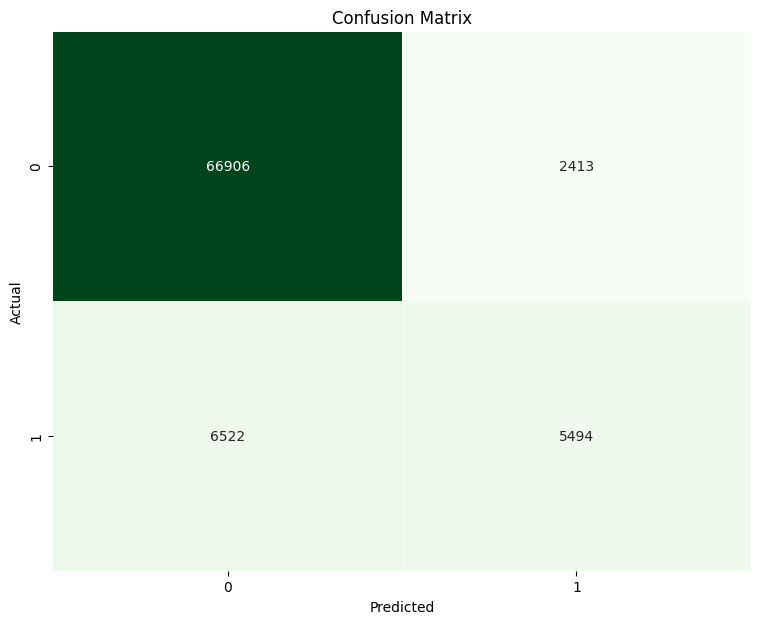

In [104]:
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix1.png', bbox_inches='tight')
plt.show()

### We try different inputs on the NN architecture, adding more nodes, using dropout, changing weights... Trying to get a petter prediction for the class 1

In [98]:
inputs = tf.keras.Input(shape=(X_transformed2.shape[1]))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


history = model.fit(
    X_train_t,
    y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=20,
    class_weight=balanced_weights,
)

Epoch 1/20
1187/1187 [==============================] - 16s 10ms/step - loss: 0.5592 - accuracy: 0.7057 - auc: 0.7836 - val_loss: 0.5066 - val_accuracy: 0.7455 - val_auc: 0.8263
Epoch 2/20
1187/1187 [==============================] - 8s 7ms/step - loss: 0.4909 - accuracy: 0.7632 - auc: 0.8416 - val_loss: 0.4817 - val_accuracy: 0.7381 - val_auc: 0.8534
Epoch 3/20
1187/1187 [==============================] - 11s 10ms/step - loss: 0.4556 - accuracy: 0.7755 - auc: 0.8659 - val_loss: 0.4266 - val_accuracy: 0.8006 - val_auc: 0.8644
Epoch 4/20
1187/1187 [==============================] - 12s 10ms/step - loss: 0.4323 - accuracy: 0.7907 - auc: 0.8802 - val_loss: 0.4773 - val_accuracy: 0.7632 - val_auc: 0.8727
Epoch 5/20
1187/1187 [==============================] - 8s 7ms/step - loss: 0.4163 - accuracy: 0.7898 - auc: 0.8889 - val_loss: 0.4078 - val_accuracy: 0.8001 - val_auc: 0.8780
Epoch 6/20
1187/1187 [==============================] - 11s 9ms/step - loss: 0.4006 - accuracy: 0.7997 - auc: 0.89

In [99]:
model.evaluate(X_test_t, y_test)
y_true = np.array(y_test)
y_pred = np.squeeze(np.array(model.predict(X_test_t) >= 0.5, dtype=int))
print(classification_report(y_true, y_pred))

2542/2542 [==============================] - 8s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.78      0.86     69319
           1       0.40      0.83      0.54     12016

    accuracy                           0.79     81335
   macro avg       0.68      0.81      0.70     81335
weighted avg       0.88      0.79      0.82     81335



In [100]:
balanced_weights

{0: 0.58598644, 1: 3.40743534}

In [101]:
balanced_weights_upd = {0:0.6, 1:2.5}

In [102]:
inputs = tf.keras.Input(shape=(X_transformed2.shape[1]))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


history = model.fit(
    X_train_t,
    y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=40,
    class_weight=balanced_weights_upd,
)

Epoch 1/40
1187/1187 [==============================] - 12s 8ms/step - loss: 0.4804 - accuracy: 0.7796 - auc: 0.7856 - val_loss: 0.4326 - val_accuracy: 0.7997 - val_auc: 0.8279
Epoch 2/40
1187/1187 [==============================] - 10s 9ms/step - loss: 0.4213 - accuracy: 0.8143 - auc: 0.8429 - val_loss: 0.3946 - val_accuracy: 0.8308 - val_auc: 0.8545
Epoch 3/40
1187/1187 [==============================] - 7s 6ms/step - loss: 0.3908 - accuracy: 0.8289 - auc: 0.8671 - val_loss: 0.3678 - val_accuracy: 0.8434 - val_auc: 0.8676
Epoch 4/40
1187/1187 [==============================] - 10s 9ms/step - loss: 0.3703 - accuracy: 0.8356 - auc: 0.8822 - val_loss: 0.3867 - val_accuracy: 0.8283 - val_auc: 0.8741
Epoch 5/40
1187/1187 [==============================] - 8s 7ms/step - loss: 0.3556 - accuracy: 0.8360 - auc: 0.8923 - val_loss: 0.3662 - val_accuracy: 0.8288 - val_auc: 0.8779
Epoch 6/40
1187/1187 [==============================] - 9s 8ms/step - loss: 0.3417 - accuracy: 0.8370 - auc: 0.9008 -

In [103]:
model.evaluate(X_test_t, y_test)
y_true = np.array(y_test)
y_pred = np.squeeze(np.array(model.predict(X_test_t) >= 0.5, dtype=int))
print(classification_report(y_true, y_pred))

2542/2542 [==============================] - 7s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.84      0.89     69319
           1       0.45      0.77      0.57     12016

    accuracy                           0.83     81335
   macro avg       0.70      0.80      0.73     81335
weighted avg       0.88      0.83      0.84     81335



In [105]:
report = classification_report(y_true, y_pred, output_dict=True)
labels = [str(label) for label in report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]
precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1_score = [report[label]['f1-score'] for label in labels]

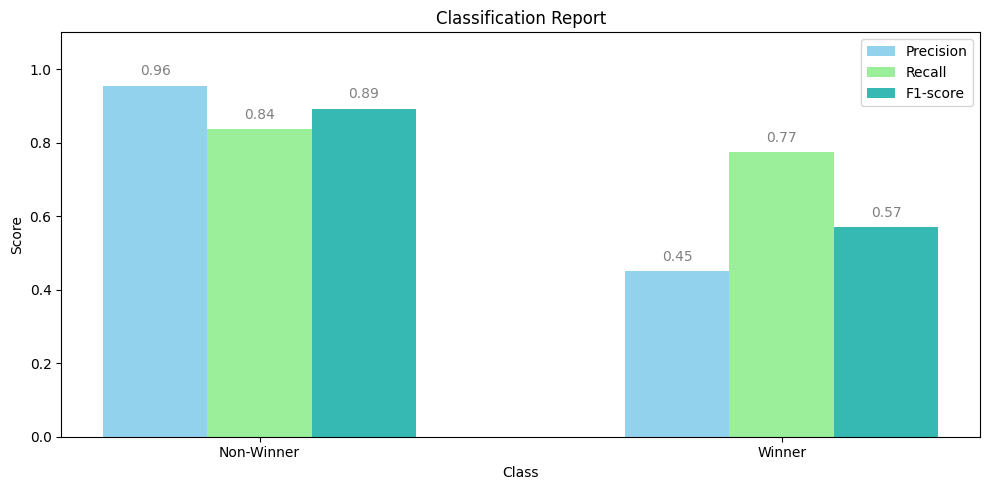

In [106]:
plt.figure(figsize=(10, 5))

bar_width = 0.2
index = np.arange(len(labels))


light_blue = 'skyblue'
light_green = 'lightgreen'
light_orange = 'lightseagreen'

plt.bar(index - bar_width, precision, color=light_blue, alpha=0.9, width=bar_width, label='Precision')
plt.bar(index, recall, color=light_green, alpha=0.9, width=bar_width, label='Recall')
plt.bar(index + bar_width, f1_score, color=light_orange, alpha=0.9, width=bar_width, label='F1-score')


plt.xticks(index, ['Non-Winner', 'Winner'])


for i, value in enumerate(precision):
    plt.text(i - bar_width, value + 0.02, f'{value:.2f}', ha='center', va='bottom', color='gray')

for i, value in enumerate(recall):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom', color='gray')

for i, value in enumerate(f1_score):
    plt.text(i + bar_width, value + 0.02, f'{value:.2f}', ha='center', va='bottom', color='gray')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Report')
plt.legend()
plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig('classification_report.png', bbox_inches='tight')
plt.show()

In [ ]:
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False)

plt.title('Focus on "Winner" Class - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix3.png', bbox_inches='tight')
plt.show()

# Plotting results evolution

- We first created a Logistic Regression as a base model
- We then have performed feature engineering
- We have run PyCaret to define what is the best performing model
- Tuned the resulting best model
- Generate a Neural Network
- Further feature engineering (adding the "Event" variable to the dataset)
- Tuned the Neural Network

(PyCaret results were run on another notebbok)

In [14]:
models = ["Base Logistic Regression", "Naive Bayes", "Decision Tree", "Ridge Classifier",
          "Linear Discriminant Analysis", "Ada Boost Classifier", "Light Gradient Boosting Machine",
          "Gradient Boosting Classifier", "Extreme Gradient Boosting", "Random Forest Classifier",
          "Extra Trees Classifier", "Logistic Regression", "Logistic Regression Tuned",
          "Neural Network", "Neural Network Tuned"]

weighted_avg = [0.33, 0.55, 0.72, 0.76, 0.77, 0.77, 0.78, 0.78, 0.78, 0.78, 0.79, 0.81, 0.82, 0.87, 0.89]

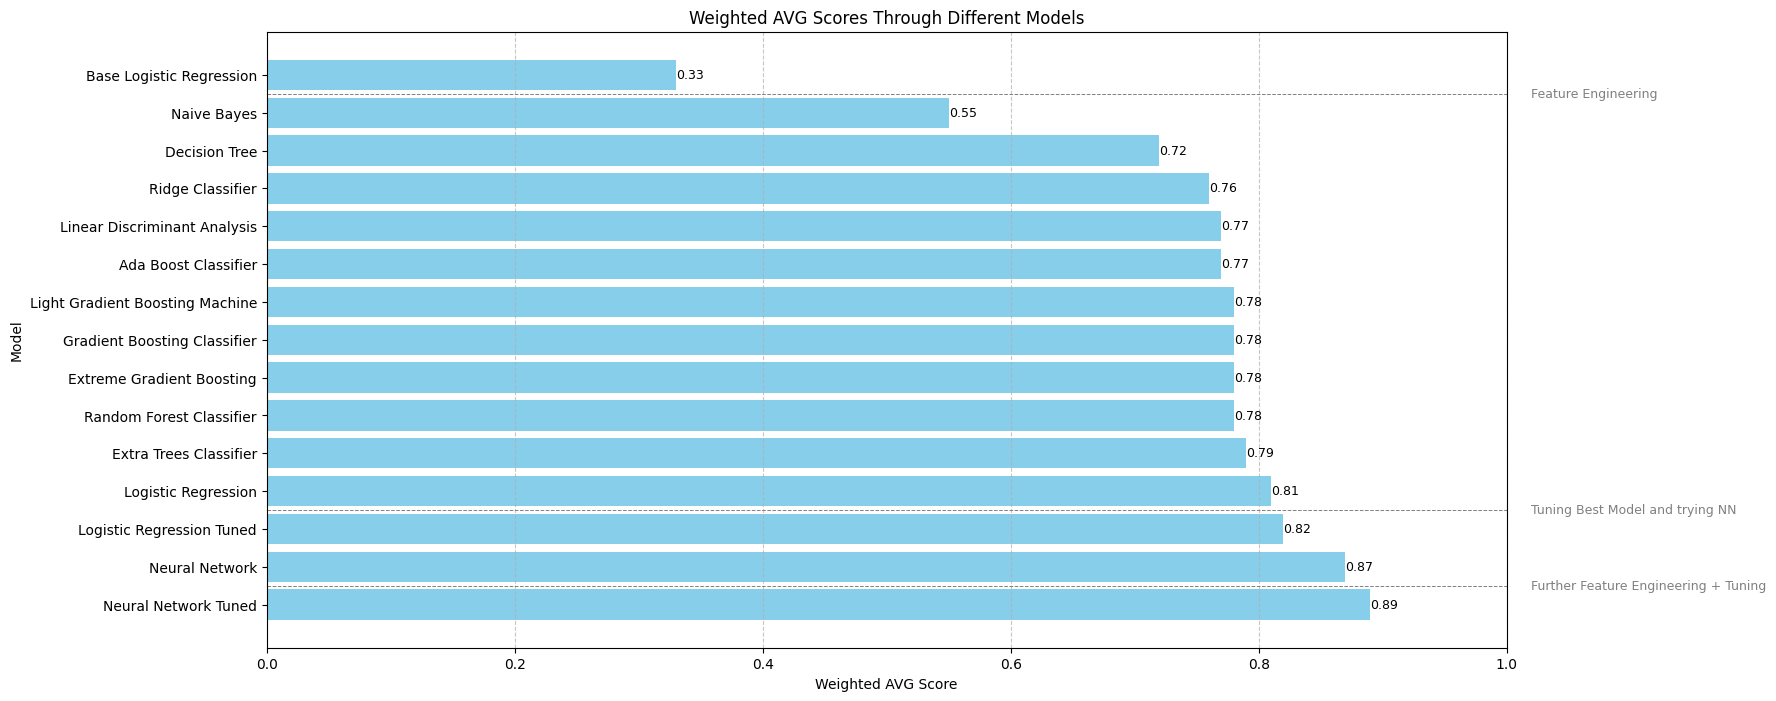

In [34]:
plt.figure(figsize=(16, 8), facecolor='white')
plt.gca().set_facecolor('white')
bars = plt.barh(models, weighted_avg, color='skyblue')


for bar, value in zip(bars, weighted_avg):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}',
             va='center', ha='left', fontsize=9)

processes = ["Feature Engineering", "Tuning Best Model and trying NN", "Further Feature Engineering + Tuning"]
line_positions = [0.5, 11.5, 13.5]
for pos, process in zip(line_positions, processes):
    plt.axhline(y=pos, color='gray', linestyle='--', linewidth=0.7)
    plt.text(1.02, pos, process, va='center', ha='left', color='gray', fontsize=9)

plt.xlabel('Weighted AVG Score')
plt.ylabel('Model')
plt.title('Weighted AVG Scores Through Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('weighted_avg_scores.png', bbox_inches='tight')
plt.show()